<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Advanced_ML_AI/Clase_03_Intro_Redes_Neuronales/03A_Introducci%C3%B3n_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 INTRODUCCIÓN
En este notebook introduciremos el concepto de redes neuronales utilizando como ejemplo el ejercicio CHALLENGE sobre churn en una empresa telco.



Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1vFXqP9QBoipKkGjajyqZEDelGllNueR51kBmXCGWzck/edit?usp=sharing)
*   [Enlace a este notebook](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Advanced_ML_AI/Clase_02_Optimizacion_Modelos/02B_%7C_Ejercicio_CHALLENGE.ipynb)
*   [Enlace a este notebook ejercicio CHALLENGE](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Advanced_ML_AI/Clase_02_Optimizacion_Modelos/02B_%7C_Ejercicio_CHALLENGE.ipynb)

## 0101 Import
Puedes importar aquí las librerías que creas que vas a necesitar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 0102 Carga el dataset del Churn Telco
Aquí teneis el url del archivo raw del dataset de churn en una empresa Telco. OJO: este es el dataset para entrenar vuestro modelo, sobre el que conocemos el target (si un cliente ha realizado o no churn). 

https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/CHURN_DF_train.csv

Importa los datos en un dataframe llamado **dataframe df_churn**.

In [2]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/CHURN_DF_train.csv'

# Importa csv
df_churn = pd.read_csv(url, sep=',')

# Pequeña limpieza
df_churn.loc[df_churn['TotalCharges']==" ", 'TotalCharges'] = np.NaN
df_churn['TotalCharges'] = df_churn['TotalCharges'].astype(float)

print(len(df_churn))

# Visualización primeras filas
df_churn.head()

5043


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,3668-QPYBK,Male,0,0,0,2,1,1,53.85,108.15,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1
1,9237-HQITU,Female,0,0,0,2,1,1,70.70,151.65,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1
2,9305-CDSKC,Female,0,0,0,8,1,1,99.65,820.50,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1
3,1452-KIOVK,Male,0,0,1,22,1,1,89.10,1949.40,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
4,6713-OKOMC,Female,0,0,0,10,0,0,29.75,301.90,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0


# 02 EDA
Para familiarizarte con los datos puedes realizar un pequeño análisis exploratorio visual. Puedes usar los métodos .shape, .info(), .describe(), por ejemplo para entender su tamaño y sus variables. 

Recuerda que puedes encontrar mis clases sobre análisis exploratorio [aquí](https://github.com/JotaBlanco/TheValley/tree/main/EDA/).

In [4]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               5043 non-null   object 
 1   gender                                   5043 non-null   object 
 2   SeniorCitizen                            5043 non-null   int64  
 3   Partner                                  5043 non-null   int64  
 4   Dependents                               5043 non-null   int64  
 5   tenure                                   5043 non-null   int64  
 6   PhoneService                             5043 non-null   int64  
 7   PaperlessBilling                         5043 non-null   int64  
 8   MonthlyCharges                           5043 non-null   float64
 9   TotalCharges                             5033 non-null   float64
 10  MultipleLines_No                         5043 no

In [5]:
df_churn.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
count,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5033.00000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.00000,5043.000000,5043.00000,5043.000000,5043.000000,5043.00000,5043.000000,5043.000000,5043.00000,5043.000000,5043.000000,5043.00000,5043.000000,5043.000000,5043.00000,5043.000000,5043.000000,5043.00000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000
mean,0.162205,0.481459,0.296847,32.431687,0.906603,0.598057,65.123468,2299.22119,0.476502,0.093397,0.430101,0.344438,0.441602,0.21396,0.395003,0.21396,0.391037,0.499504,0.21396,0.286536,0.437636,0.21396,0.348404,0.442792,0.21396,0.343248,0.488995,0.21396,0.297045,0.397184,0.21396,0.388856,0.547293,0.209399,0.243308,0.216339,0.219512,0.333532,0.230617,0.269086
std,0.368675,0.499706,0.456914,24.637729,0.291017,0.490339,30.006342,2276.04620,0.499497,0.291017,0.495139,0.475232,0.496627,0.41014,0.488900,0.41014,0.488031,0.500049,0.41014,0.452188,0.496145,0.41014,0.476512,0.496766,0.41014,0.474841,0.499928,0.41014,0.457002,0.489363,0.41014,0.487539,0.497808,0.406920,0.429122,0.411789,0.413957,0.471521,0.421269,0.443529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.80000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,38.375000,411.60000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.700000,1405.30000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,90.000000,3834.40000,1.000000,0.000000,1.000000,1.000000,1.000000,0.00000,1.000000,0.00000,1.000000,1.000000,0.00000,1.000000,1.000000,0.00000,1.000000,1.000000,0.00000,1.000000,1.000000,0.00000,1.000000,1.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.80000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 03 Preparación de los datos
Normalmente el dataframe contiene nulos, así como variables categóricas y presencia de ciertas variables que probablemente no queramos usar. 

Necesitamos limpiarlo antes de poder entrenar los modelos.

### 0301 Variables Útiles
De entre las variables disponibles, quedémonos con la que queramos utilizar como predictoras para el estudio.

In [6]:
df_churn.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,3668-QPYBK,Male,0,0,0,2,1,1,53.85,108.15,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1
1,9237-HQITU,Female,0,0,0,2,1,1,70.70,151.65,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1


In [7]:
df_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'Payment

In [8]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

cat_cols = ['gender']

In [9]:
df_churn = df_churn[cols+['Churn']]

### 030102 Dumificación de variables categóricas
Recuerda que debemos transformar las variables categóricas para convertirlas en numéricas.

In [10]:
df_churn = pd.get_dummies(df_churn[cols+['Churn']], 
                          prefix_sep='_',
                          drop_first=True, 
                          columns=cat_cols)

display(df_churn.shape)

df_churn.head()

(5043, 41)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,gender_Male
0,0,0,0,2,1,1,53.85,108.15,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,1
1,0,0,0,2,1,1,70.70,151.65,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0
2,0,0,0,8,1,1,99.65,820.50,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0
3,0,0,1,22,1,1,89.10,1949.40,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,0,0,0,10,0,0,29.75,301.90,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0


### 030103 Limpieza de nulos
Recuerda que puedes mirarlo con dataframe.isna().sum() y si sí hay nulos, puedes rellenarlos con el método .fillna().

In [11]:
df_churn.isna().sum()

SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               10
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
StreamingTV_No                              0
StreamingTV_No internet service             0
StreamingTV_Yes                             0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                          0
OnlineBackup_No                             0
OnlineBackup_No internet service  

In [12]:
df_churn['TotalCharges'] = df_churn['TotalCharges'].fillna(df_churn['TotalCharges'].mean())

In [13]:
df_churn.isna().sum()

SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
StreamingTV_No                             0
StreamingTV_No internet service            0
StreamingTV_Yes                            0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBack

### 030104 Estandarización
Normalizamos (estandarizamos) las variables numéricas. Scklearn propone distintos métodos:

*   [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
*   [sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
*   [sklearn.preprocessing.normalize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html)

In [14]:
df_churn.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,gender_Male
0,0,0,0,2,1,1,53.85,108.15,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,1
1,0,0,0,2,1,1,70.70,151.65,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0
2,0,0,0,8,1,1,99.65,820.50,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0
3,0,0,1,22,1,1,89.10,1949.40,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,0,0,0,10,0,0,29.75,301.90,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [16]:
# columnas no binarias 
display(df_churn.loc[:,df_churn.isin([0,1]).all()==False].columns)

# non-binary cols
non_binary_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [17]:
from sklearn.preprocessing import StandardScaler

# Inicializamos objeto de normalización
scaler = StandardScaler()

# "Entrenamos" el objeto 
scaler.fit(df_churn[non_binary_cols])

# Transformamos las columnas no binarias
df_churn[non_binary_cols] = scaler.transform(df_churn[non_binary_cols])

df_churn.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,gender_Male
0,0,0,0,-1.235289,1,1,-0.375740,-0.963717,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,1
1,0,0,0,-1.235289,1,1,0.185864,-0.944584,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0
2,0,0,0,-0.991735,1,1,1.150755,-0.650398,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0
3,0,0,1,-0.423445,1,1,0.799128,-0.153865,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,0,0,0,-0.910551,0,0,-1.178983,-0.878498,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0


### 030105 Train - test

In [18]:
# Primero generamos la matriz X con las variables predictoras 
# y el vector y con la variable a predecir
X = df_churn.drop('Churn',axis=1)
y = df_churn['Churn']

# Comprueba sus tamaños
X.shape, y.shape

((5043, 40), (5043,))

In [19]:
# Haz la partición train-test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33,
                                                    random_state=42)

# Comprueba sus tamaños
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3378, 40), (1665, 40), (3378,), (1665,))

# 04 Entrenamos una red neuronal con Keras

Aquí podéis encontrar [un buen notebook ejemplo](https://colab.research.google.com/github/keras-team/keras-io/blob/master/guides/ipynb/sequential_model.ipynb) (de la documentación de Keras) sobre cómo definir redes neuronales secuenciales. 

## 0401 Importamos Keras

In [20]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

## 0402 Definimos arquitectura
Más info sobre la función de activación softmax [aquí](https://en.wikipedia.org/wiki/Softmax_function).

In [21]:
# Inicializamos la red neuronal
modelo = Sequential([
    Dense(1000, activation='relu', input_shape=(X.shape[1],)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation="sigmoid")
    ], name = 'Mi_primera_red_neuronal')

modelo

In [22]:
modelo.summary()

Model: "Mi_primera_red_neuronal"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              41000     
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1001      
Total params: 2,044,001
Trainable params: 2,044,001
Non-trainable params: 0
_________________________________________________________________


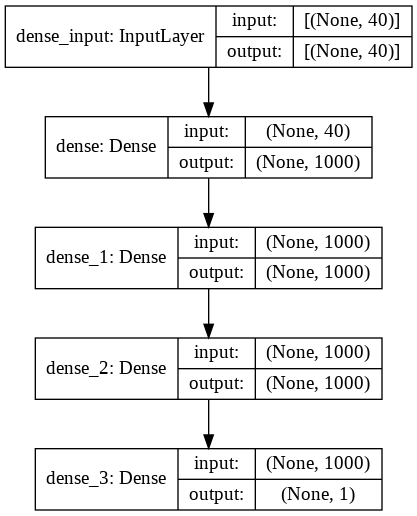

In [23]:
keras.utils.plot_model(modelo, "imagen.png", show_shapes=True)

## 0403 Compilamos

In [24]:
modelo.compile(optimizer = 'sgd', 
               loss = 'binary_crossentropy', 
               metrics = ['accuracy'])

modelo

## 0404 Entrenamos
[Colab notebook](https://colab.research.google.com/github/keras-team/keras-io/blob/master/guides/ipynb/training_with_built_in_methods.ipynb#scrollTo=IFz5UrHJC4SF) muy completo de la documentacion de Keras sobre el entrenamiento de redes neuronales.

In [25]:
modelo.fit(X_train, y_train, epochs=25, batch_size=50)
modelo

Epoch 1/25
68/68 [==============================] - 2s 27ms/step - loss: 0.6287 - accuracy: 0.7047
Epoch 2/25
68/68 [==============================] - 2s 27ms/step - loss: 0.5290 - accuracy: 0.7258
Epoch 3/25
68/68 [==============================] - 2s 26ms/step - loss: 0.4949 - accuracy: 0.7197
Epoch 4/25
68/68 [==============================] - 2s 27ms/step - loss: 0.4783 - accuracy: 0.7541
Epoch 5/25
68/68 [==============================] - 2s 27ms/step - loss: 0.4552 - accuracy: 0.7804
Epoch 6/25
68/68 [==============================] - 2s 27ms/step - loss: 0.4558 - accuracy: 0.7831
Epoch 7/25
68/68 [==============================] - 2s 26ms/step - loss: 0.4520 - accuracy: 0.7866
Epoch 8/25
68/68 [==============================] - 2s 26ms/step - loss: 0.4222 - accuracy: 0.7995
Epoch 9/25
68/68 [==============================] - 2s 26ms/step - loss: 0.4413 - accuracy: 0.7901
Epoch 10/25
68/68 [==============================] - 2s 26ms/step - loss: 0.4306 - accuracy: 0.8062
Epoch 11/

In [26]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = modelo.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
14/14 [==============================] - 0s 13ms/step - loss: 0.4009 - accuracy: 0.8096
test loss, test acc: [0.40088385343551636, 0.809609591960907]


## 0405 Predecimos


In [27]:
# Usamos la red neuronal para predecir sobre el dataset de entrenamiento
y_pred_train = np.argmax(modelo.predict(X_train), axis=-1)

# Usamos la red neuronal para predecir sobre el dataset de test
y_pred_test = np.argmax(modelo.predict(X_test), axis=-1)

In [28]:
# Calidad predicción train
ac_train = round(accuracy_score(y_train, y_pred_train), 4)
print('Precisión en set de entrenamiento :', ac_train)

# Calidad predicción test
ac_test = round(accuracy_score(y_test, y_pred_test), 4)
print('Precisión en set de test :', ac_test)

# Degradación de la predicción
print('Degradación: ' + str(round((ac_test-ac_train)/ac_train*100,2)) + '%')

Precisión en set de entrenamiento : 0.7197
Precisión en set de test : 0.7538
Degradación: 4.74%


# 05 EJERCICIO
Entrena una red neuronal que prediga si se da o no una complicación en una operación quirúrgica.

## 0501 Carga el dataset de complicaciones quirúrgicas
Aquí teneis el url del archivo raw del dataset: 

https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/complicacion_quirurgica.csv

Importa los datos en un dataframe llamado **dataframe df**.

In [30]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/complicacion_quirurgica.csv'

# Importa csv
df = pd.read_csv(url, sep=',')

# Visualización primeras filas
df.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,baseline_psych,baseline_pulmonary,ahrq_ccs,ccsComplicationRate,ccsMort30Rate,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,0,0,19,0.183370,0.007424,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,0,0,1,0.312029,0.016673,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,0,0,6,0.150706,0.001962,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,0,0,7,0.056166,0.000000,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,0,0,11,0.197305,0.002764,0.00,0,0,7.88,11,0,0,0.00,1,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bmi                  14635 non-null  float64
 1   Age                  14635 non-null  float64
 2   asa_status           14635 non-null  int64  
 3   baseline_cancer      14635 non-null  int64  
 4   baseline_charlson    14635 non-null  int64  
 5   baseline_cvd         14635 non-null  int64  
 6   baseline_dementia    14635 non-null  int64  
 7   baseline_diabetes    14635 non-null  int64  
 8   baseline_digestive   14635 non-null  int64  
 9   baseline_osteoart    14635 non-null  int64  
 10  baseline_psych       14635 non-null  int64  
 11  baseline_pulmonary   14635 non-null  int64  
 12  ahrq_ccs             14635 non-null  int64  
 13  ccsComplicationRate  14635 non-null  float64
 14  ccsMort30Rate        14635 non-null  float64
 15  complication_rsi     14635 non-null 

## 0502 Estandarización
Normaliza las variables numéricas para que estén en la misma escala.


In [33]:
# columnas no binarias 
display(df.loc[:,df.isin([0,1]).all()==False].columns)

# non-binary cols
non_binary_cols = ['bmi', 'Age', 'asa_status', 'baseline_charlson', 'ahrq_ccs',
       'ccsComplicationRate', 'ccsMort30Rate', 'complication_rsi', 'dow',
       'hour', 'month', 'moonphase', 'mortality_rsi', 'race']

Index(['bmi', 'Age', 'asa_status', 'baseline_charlson', 'ahrq_ccs',
       'ccsComplicationRate', 'ccsMort30Rate', 'complication_rsi', 'dow',
       'hour', 'month', 'moonphase', 'mortality_rsi', 'race'],
      dtype='object')

In [34]:
from sklearn.preprocessing import StandardScaler

# Inicializamos objeto de normalización
scaler = StandardScaler()

# "Entrenamos" el objeto 
scaler.fit(df[non_binary_cols])

# Transformamos las columnas no binarias
df[non_binary_cols] = scaler.transform(df[non_binary_cols])

df.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,baseline_psych,baseline_pulmonary,ahrq_ccs,ccsComplicationRate,ccsMort30Rate,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,-1.470192,-0.221438,0.680973,1,-0.555947,0,0,0,0,0,0,0,1.665152,0.563363,0.650249,0.096348,0.930121,0,-0.955569,0.026111,-0.161515,0,0.340610,0.220924,0
1,-1.541337,-0.226966,-1.171107,0,-0.555947,0,0,0,0,0,0,0,-0.925067,2.018785,2.670288,0.678721,-1.072967,0,1.037069,-1.825904,-0.161515,0,0.357359,0.220924,0
2,-1.158629,-0.232495,-1.171107,0,-0.555947,0,0,0,0,0,0,0,-0.205562,0.193857,-0.542549,0.521928,0.262425,0,-0.936771,-0.282558,1.565128,0,0.767721,0.220924,0
3,-1.570776,-0.232495,0.680973,0,0.012785,0,0,1,1,0,0,0,-0.061661,-0.875614,-0.971115,0.036618,0.262425,1,-0.974368,-0.591228,1.565128,0,0.432732,0.220924,0
4,-1.422354,-0.232495,0.680973,0,-0.555947,0,0,0,0,0,0,0,0.513944,0.720993,-0.367390,0.521928,-1.072967,0,-0.861577,1.569457,-1.024837,0,0.700723,0.220924,0


## 0503 Train - test
Separa el dataset en train y test.

In [36]:
# Primero generamos la matriz X con las variables predictoras 
# y el vector y con la variable a predecir
X = df.drop('complication',axis=1)
y = df['complication']

# Comprueba sus tamaños
X.shape, y.shape

((14635, 24), (14635,))

In [37]:
# Haz la partición train-test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33,
                                                    random_state=42)

# Comprueba sus tamaños
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9805, 24), (4830, 24), (9805,), (4830,))

## 0504 Entrena una red neuronal
Prueba de hecho varias, con distintas arquitecturas.

In [40]:
# Inicializamos la red neuronal
modelo_1 = Sequential([
    Dense(1000, activation='relu', input_shape=(X.shape[1],)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation="sigmoid")
    ], name = 'Red_1')

modelo_1.compile(optimizer = 'sgd', 
               loss = 'binary_crossentropy', 
               metrics = ['accuracy'])

modelo_1

In [41]:
# Inicializamos la red neuronal
modelo_2 = Sequential([
    Dense(100, activation='relu', input_shape=(X.shape[1],)),
    Dense(100, activation='relu'),
    Dense(1, activation="sigmoid")
    ], name = 'Red_2')

modelo_2.compile(optimizer = 'sgd', 
               loss = 'binary_crossentropy', 
               metrics = ['accuracy'])
modelo_2

In [45]:
modelo_1.fit(X_train, y_train, epochs=5, batch_size=50)

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = modelo_1.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Epoch 1/5
197/197 [==============================] - 13s 66ms/step - loss: 0.4212 - accuracy: 0.8012
Epoch 2/5
197/197 [==============================] - 13s 65ms/step - loss: 0.4171 - accuracy: 0.8052
Epoch 3/5
197/197 [==============================] - 13s 65ms/step - loss: 0.4137 - accuracy: 0.8042
Epoch 4/5
197/197 [==============================] - 13s 65ms/step - loss: 0.4107 - accuracy: 0.8050
Epoch 5/5
197/197 [==============================] - 13s 66ms/step - loss: 0.4083 - accuracy: 0.8053
Evaluate on test data
38/38 [==============================] - 1s 30ms/step - loss: 0.4128 - accuracy: 0.8014
test loss, test acc: [0.4127724766731262, 0.8014492988586426]


In [46]:
modelo_2.fit(X_train, y_train, epochs=5, batch_size=50)

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = modelo_2.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Epoch 1/5
197/197 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.7990
Epoch 2/5
197/197 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.8015
Epoch 3/5
197/197 [==============================] - 0s 1ms/step - loss: 0.4263 - accuracy: 0.8005
Epoch 4/5
197/197 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.8003
Epoch 5/5
197/197 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8017
Evaluate on test data
38/38 [==============================] - 0s 1ms/step - loss: 0.4234 - accuracy: 0.7973
test loss, test acc: [0.4233614504337311, 0.7973085045814514]


In [47]:
# Usamos la red neuronal para predecir sobre el dataset de entrenamiento
y_pred_train = np.argmax(modelo_1.predict(X_train), axis=-1)

# Usamos la red neuronal para predecir sobre el dataset de test
y_pred_test = np.argmax(modelo_1.predict(X_test), axis=-1)

# Calidad predicción train
ac_train = round(accuracy_score(y_train, y_pred_train), 4)
print('Precisión en set de entrenamiento :', ac_train)

# Calidad predicción test
ac_test = round(accuracy_score(y_test, y_pred_test), 4)
print('Precisión en set de test :', ac_test)

# Degradación de la predicción
print('Degradación: ' + str(round((ac_test-ac_train)/ac_train*100,2)) + '%')

Precisión en set de entrenamiento : 0.7453
Precisión en set de test : 0.753
Degradación: 1.03%


In [48]:
# Usamos la red neuronal para predecir sobre el dataset de entrenamiento
y_pred_train = np.argmax(modelo_2.predict(X_train), axis=-1)

# Usamos la red neuronal para predecir sobre el dataset de test
y_pred_test = np.argmax(modelo_2.predict(X_test), axis=-1)

# Calidad predicción train
ac_train = round(accuracy_score(y_train, y_pred_train), 4)
print('Precisión en set de entrenamiento :', ac_train)

# Calidad predicción test
ac_test = round(accuracy_score(y_test, y_pred_test), 4)
print('Precisión en set de test :', ac_test)

# Degradación de la predicción
print('Degradación: ' + str(round((ac_test-ac_train)/ac_train*100,2)) + '%')

Precisión en set de entrenamiento : 0.7453
Precisión en set de test : 0.753
Degradación: 1.03%
